# Product Launch Dates

In the previous milestone, we did a case study on the iPhone X and saw that the release date of the iPhone X had a huge impact on the youtube platform\
as a considerable amount of videos as well as views were drawn towards the iPhone X during its release day.

In this milestone, we want to check if this is the case for other products as well. We will be looking at the release dates of the following products:
- iPhone 6
- Galaxy S9
- Sony xperia xz2

***
### Importance of Release Dates

In [1]:
import pandas as pd
import datetime
from topics.data_extraction import DataExtractor
from topics.configs import get_config
pd.options.mode.chained_assignment = None
import topics.data_vis as vis

In [2]:
# helper class that performs all data extraction tasks
de = DataExtractor(get_config('data_extraction'))

In [3]:
channel_data = pd.read_csv('data/df_timeseries_en.tsv', sep='\t')
video_data = pd.read_csv('data/yt_tech_channels_metadata.tsv.gz', sep='\t', compression='gzip')

In [4]:
iphone_df = []
df = video_data.copy()
df['title'] = df['title'].astype(str)
item_df = df[df['title'].str.contains('iphone x', case=False)]

item_df["upload_date"] = pd.to_datetime(df["upload_date"])
item_df = item_df[(item_df['upload_date'] >= datetime.datetime.strptime('03-11-2017', '%d-%m-%Y') - datetime.timedelta(days=180)) & (item_df['upload_date'] <= datetime.datetime.strptime('03-11-2017', '%d-%m-%Y') + datetime.timedelta(days=180))]

if len(item_df) > 0:
    iphone_df.append(item_df)

iphone_df = pd.concat(iphone_df)

In [5]:
# set of products to be used in the analysis
items = ['iphone x', 'iphone 6', 'galaxy s9', 'xperia xz2']
releases = ['03-11-2017', '19-09-2014', '16-03-2018', '20-04-2018']

In [6]:
# dictionary of dataframes containing all the data related to each product
product_dfs = de.products_data(items, releases)

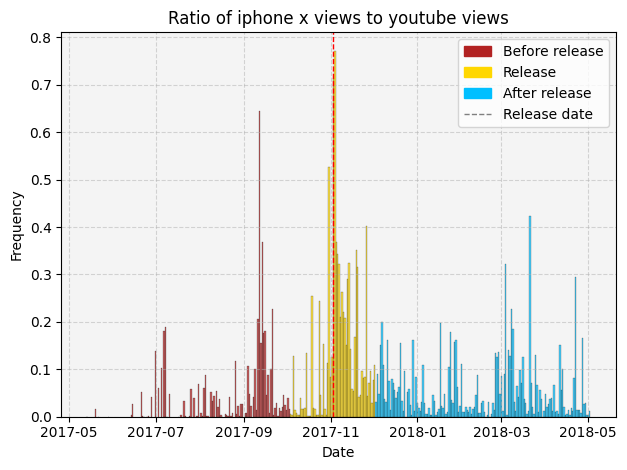

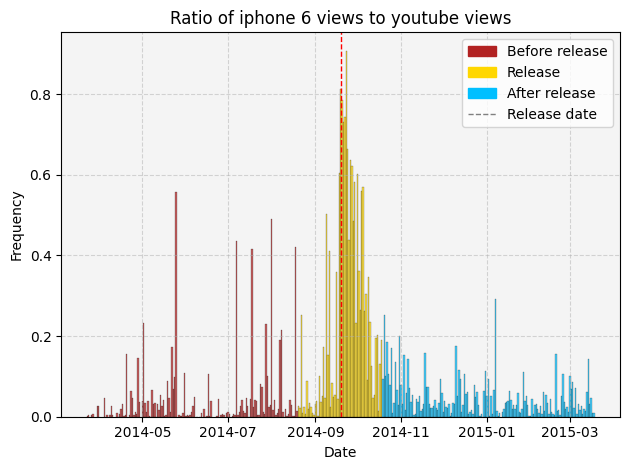

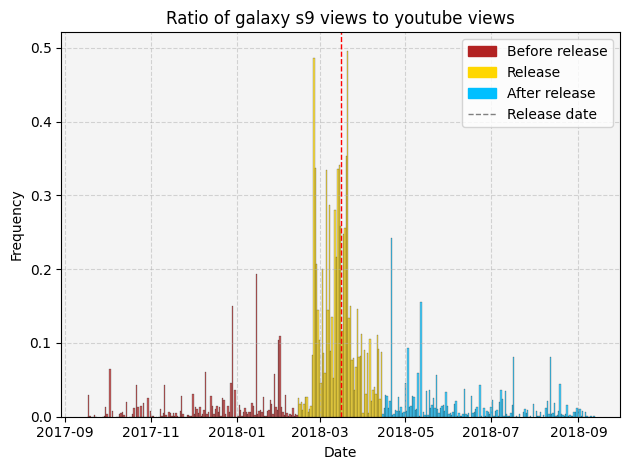

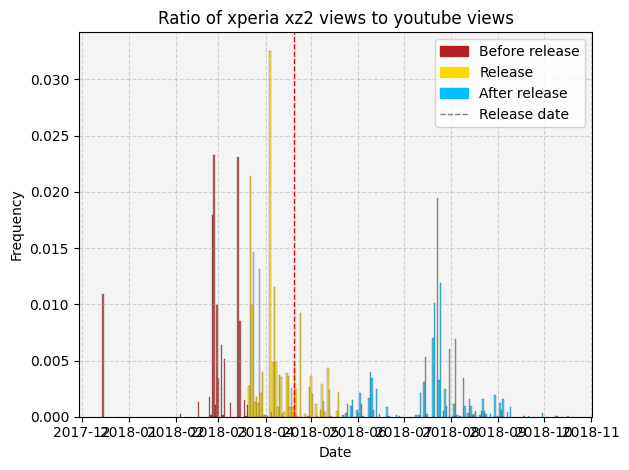

In [7]:
for i in range(len(items)):
    views = de.ratio_views(product_dfs[items[i]])
    vis.plot_product_hist(list(views.keys()), list(views.values()), releases[i], 'Ratio of '+items[i]+' views to youtube views')

This should be somewhat convincing that the release dates of products are important.\
Now the question to ask is: How can we make the most out of these release dates?\

In the previous milestone, we did a case study where we performed topic extraction on the titles of the videos\
related to the iPhone X pre-release and post-release.\
And other than the fact that the topics are very different, they are also rational since in the pre-release period,\
videos mainly addressed leaks and rumors about the iPhone X, while in the post-release period, videos were mainly about\
reviews and unboxing of the iPhone X.

Now all of this is great, but we didn't really see how videos about those specific topics impacted the overall channel growth.\
This is the question we will be answering in this milestone.

***
### Topics and Channel Growth

In [8]:
from datetime import datetime as dt
# lists of topic keywords
pre_release = ["leak", "unboxing", "prototype", "new", "secret"]
post_release = ["review", "unboxing", "camera", "test", "setup"]
iphone_df = product_dfs['iphone x']
pre_release_start = (datetime.datetime.strptime(releases[0], '%d-%m-%Y') - datetime.timedelta(days=180)).strftime('%Y-%m-%d')
pre_release_end = (datetime.datetime.strptime(releases[0], '%d-%m-%Y') + datetime.timedelta(days=180)).strftime('%Y-%m-%d')
iphone_release = dt.strptime(releases[0], '%d-%m-%Y').strftime('%Y-%m-%d')

In [15]:
topic_info = de.get_topic_info(iphone_df, pre_release_start, pre_release_end, pre_release)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [16]:
vis.plot_line(topic_info['ratio_views'], releases[0], 'Ratio of delta-views to views for iphone x channels')

these are the dates [Timestamp('2017-05-08 00:00:00'), Timestamp('2017-05-15 00:00:00'), Timestamp('2017-05-22 00:00:00'), Timestamp('2017-05-29 00:00:00'), Timestamp('2017-06-05 00:00:00'), Timestamp('2017-06-12 00:00:00'), Timestamp('2017-06-19 00:00:00'), Timestamp('2017-06-26 00:00:00'), Timestamp('2017-07-03 00:00:00'), Timestamp('2017-07-10 00:00:00'), Timestamp('2017-07-17 00:00:00'), Timestamp('2017-07-24 00:00:00'), Timestamp('2017-07-31 00:00:00'), Timestamp('2017-08-07 00:00:00'), Timestamp('2017-08-14 00:00:00'), Timestamp('2017-08-21 00:00:00'), Timestamp('2017-08-28 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-11 00:00:00'), Timestamp('2017-09-18 00:00:00'), Timestamp('2017-09-25 00:00:00'), Timestamp('2017-10-02 00:00:00'), Timestamp('2017-10-09 00:00:00'), Timestamp('2017-10-16 00:00:00'), Timestamp('2017-10-23 00:00:00'), Timestamp('2017-10-29 00:00:00'), Timestamp('2017-10-30 00:00:00'), Timestamp('2017-11-05 00:00:00'), Timestamp('2017-11-06 00:00

In [17]:
vis.plot_line(topic_info['ratio_subs'], releases[0], 'ratio of delta subs to subs for iphone x channels')

these are the dates [Timestamp('2017-05-08 00:00:00'), Timestamp('2017-05-15 00:00:00'), Timestamp('2017-05-22 00:00:00'), Timestamp('2017-05-29 00:00:00'), Timestamp('2017-06-05 00:00:00'), Timestamp('2017-06-12 00:00:00'), Timestamp('2017-06-19 00:00:00'), Timestamp('2017-06-26 00:00:00'), Timestamp('2017-07-03 00:00:00'), Timestamp('2017-07-10 00:00:00'), Timestamp('2017-07-17 00:00:00'), Timestamp('2017-07-24 00:00:00'), Timestamp('2017-07-31 00:00:00'), Timestamp('2017-08-07 00:00:00'), Timestamp('2017-08-14 00:00:00'), Timestamp('2017-08-21 00:00:00'), Timestamp('2017-08-28 00:00:00'), Timestamp('2017-09-04 00:00:00'), Timestamp('2017-09-11 00:00:00'), Timestamp('2017-09-18 00:00:00'), Timestamp('2017-09-25 00:00:00'), Timestamp('2017-10-02 00:00:00'), Timestamp('2017-10-09 00:00:00'), Timestamp('2017-10-16 00:00:00'), Timestamp('2017-10-23 00:00:00'), Timestamp('2017-10-29 00:00:00'), Timestamp('2017-10-30 00:00:00'), Timestamp('2017-11-05 00:00:00'), Timestamp('2017-11-06 00:00

We can see that the growth of channels that talked about leaks during the pre-release period of the iphone actually plateaued\
Everything exciting started right at the release date of the iPhone X.\
Where we see a steady increase in the growth of the views and the number of subscribers of the channels that talked about leaks.

We can thus conclude that talking about leaks and rumours during the pre-release period might not actually have a big positive impact on the growth of the channel.\
You might be targetting a small niche of people that want to know the details before the release, but the mainstream audience will only be interested in the product after its release.